# Случайные процессы. Прикладной поток.
## Практическое задание 7

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[СП17] Фамилия Имя - Задание 7"`. Квадратные скобки обязательны, внутри них пробела быть не должно. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `7.N.ipynb` и `7.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* При проверке могут быть запущены функции, которые отвечают за генерацию траекторий винеровского процесса.

------------------

In [203]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import warnings
warnings.simplefilter('ignore')

## Регрессия на гауссовских процессах

Напомним задачу регрессии. Пусть имеется некоторая функциональная зависимость $y = f(x)$. Для ее оценки проводится серия испытаний в точках $x_1, ..., x_n$, в которых получаются значения $Y_i = f(x_i) + \varepsilon_i$, где $\varepsilon_i$ --- случайная ошибка измерений. Задача состоит в том, чтобы по этим наблюдениям оценить зависимость $f$. В курсе статистики мы рассматривали случай линейных функций. Теперь рассмотрим случай, когда $f$ является траекторией некоторого стационарного гауссовского процесса.

*Внимание!* Далее происходит смена обозначений на принятые в случайных процессах. Буква $x$ меняется на $t$, а буква $y$ меняется на $x$.

Пусть $X = (X_t, t \in \mathbb{R})$ --- стационарный гауссовский процесс с нулевой функцией среднего и ковариационной функцией $R(t) = cov(X_t, X_0)$. Даны его измерения $x_1, ..., x_n$ в моменты времени $t_1, ..., t_n$ соответственно. Тогда условное распределение $X_t$ при условии $X_{t_1} = x_1, ..., X_{t_n} = x_n$ является нормальным со средним $r^TC^{-1}\overrightarrow{x}$ и дисперсией $R(0) - r^TC^{-1}r$, где $C=\left(R(t_i - t_j)\right)_{i,j}$, $r=\left(R(t - t_1), ..., R(t - t_n)\right)^T$, $\overrightarrow{x}=\left(x_1, ..., x_n\right)^T$.


Байесовской оценкой общего вида значения процесса в момент времени $t$ является условное распределение $X_t$ при условии $...$.
В качестве точечной оценки обычно берут условное математическое ожидание $\mathsf{E}\left(X_t \left| X_{t_1} = x_1,\ ...,\ X_{t_n} = x_n \right. \right)$.
Кроме того, для каждого $t$ можно построить доверительный интервал для величины $X_t$, зная условную дисперсию.

Предположим, что для каждого $t$ построен доверительный интервал для $X_t$ уровня доверия 0.95. Верно ли, что $\mathsf{P}(\exists t: \text{истинное значение $X_t$ не попало в свой доверительный интервал}) \leqslant 0.05$?

**Ответ:** Нет, не верно. <br>
Верным утверждением будет $\mathsf{P}(\text{истинное значение $X_t$ не попало в свой доверительный интервал}) \leqslant 0.05$ <br>
Почему неверно? <br> 

$\mathsf{P}(\exists t: \text{истинное значение $X_t$ не попало в свой доверительный интервал}) = \mathsf{P}( \text{не } \forall t: \text{истинное значение $X_t$ попало в свой доверительный интервал}) $ <br>
$= 1 - \mathsf{P}(\forall t: \text{истинное значение $X_t$ попало в свой доверительный интервал})$ <br> <br>
Пусть $X_t$ не зависят друг от друга, тогда получим : <br>
$\mathsf{P}(\forall t: \text{истинное значение $X_t$ попало в свой доверительный интервал})$ <br>
$= \prod_{t} \mathsf{P}(\text{истинное значение $X_t$ попало в свой доверительный интервал}) = \prod_{t} 0.95 = 0.95^{k}$, где $k$ - кол-во $X_t$. <br> <br>
$\Rightarrow \mathsf{P}(\exists t: \text{истинное значение $X_t$ не попало в свой доверительный интервал}) = 1 - 0.95^{k} >0.05$ при $k > 2$

Напишите класс регрессии на гауссовских процессах.
Интерфейс похож на интерфейс библиотеки `scikit-learn`.

Наш класс будет работать для времени из $\mathbb{R}^d$, а не $\mathbb{R}$.
Почему так можно сделать на основе решенной задачи?

**Ответ:** <br>
Заметим, что в случае $\mathbb{R}^d$ разница будет лишь в том, что ковариационная функция $R$ будет принимать не число, а вектор. По-прежнему, ковариационная функция возвращает число и, следовательно матрица $C$ будет иметь такую же размерность (n, n), что и в случае с $\mathbb{R}$ и элементами матрицы $C$ будут числа вида $R(t_i - t_j)$. <br>
Аналогично с векторм $r$: он будет иметь размерность n и его элементами будут являться числа $R(t - t_i)$, что и в случае с $\mathbb{R}$. <br>
По-прежнему: $\overrightarrow{x}=\left(x_1, ..., x_n\right)^T$, где $x_i$ - числа  <br>
Таким образом, суть решения никак не поменяется<br>

При написании класса пользуйтесь `numpy.matrix` для работы с матрицами, либо операцией `@` для объектов `numpy.array`.

В методе fit будем считать матрицу $C$ и $C^{-1}$, так как только она не зависит от $t$. <br>
Также заметим, что так как мы знаем, что условное распределение $X_t | X_{t_1} = x_1, ...,X_{t_n} = x_n$ является нормальным со средним $r^TC^{-1}\overrightarrow{x}$, то  $values = \mathsf{E}\left(X_t \left| X_{t_1} = x_1,\ ...,\ X_{t_n} = x_n \right. \right) = r^TC^{-1}\overrightarrow{x}$

In [126]:
class GaussianProcessRegression:
    
    def __init__(self, cov_function):
        self.cov_function = cov_function
    
    
    def fit(self, T, X):
        ''' "Обучение" модели регрессии.
                T --- np.array, размерность (n, d): моменты времени, 
                      в которые проведены измерения
                X --- np.array, размерность n: полученные значения процесса
        '''
#         a - матрица вида (T, T, ..., T), где T - столбец
#         b - матрица вида (T
#                           T 
#                          ... 
#                           T), где T - строка

        a = np.tile(T.reshape((len(T), len(T[0]))), (1, len(T))).reshape(len(T), len(T), len(T[0]))
        b = np.tile(T, (len(T), 1)).reshape(len(T), len(T), len(T[0]))
        self.C = self.cov_function(a - b)
        self.C_inv = np.linalg.inv(self.C)

        self.d = len(T[0])
        self.T = T
        self.X = X
        
        return self
        
        
    def predict(self, T):
        ''' Оценка значения процесса. 
                T --- np.array, размерность (n, d): моменты времени, 
                      в которые нужно оценить значения. 
                
            Возвращает:
                values --- np.array, размерность n: предсказанные 
                           значения процесса
                sigma --- np.array, размерность n: соответствующая дисперсия
        '''
        for_r = T.reshape(len(T), 1, self.d) - np.tile(self.T, (len(T), 1)).reshape(len(T), len(self.T), self.d)
        r = self.cov_function(for_r)
        temp = r @ self.C_inv
        
        values = temp @ self.X
        
        temp = temp.reshape(len(temp), 1, len(temp[0]))
        
        sigma = self.cov_function(np.zeros((1, self.d))) -  temp @ r.reshape(len(r), len(r[0]), 1)
        sigma = sigma.reshape(len(sigma))
        
        return values, sigma

Зададим какую-нибудь простую функцию $f(t)$

In [59]:
def calc_f(t, a=0.2, b=0.5, c=2):
    return np.log(1 + t) + a * t + b * np.sin(c * t)

И ковариационную функцию
$$R(t) = a\ exp\left(\frac{\left|\left| t \right|\right|^2} {2s^2} \right),$$

* $t \in \mathbb{R}^d$
* $a, s > 0$ --- параметры

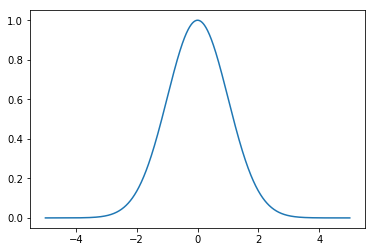

In [60]:
def exp_cov(t, a=1, s=1):
    return a * np.exp(-(t ** 2).sum(axis=-1) / (2 * s ** 2))

grid = np.linspace(-5, 5, 1001)
plt.figure(figsize=(6, 4))
plt.plot(grid, exp_cov(grid.reshape((-1, 1))))
plt.show()

Проведем эксперименты.
Зададим гауссовский процесс $(X_t, t\in\mathbb{R})$ в виде $X_t = f(t) + \sigma\varepsilon_t$, где $(\varepsilon_t, t\in\mathbb{R})$ --- гауссовский белый шум, то есть все $\varepsilon_t$ независимы и имеют стандартное нормальное распределение.

В качестве моментов времени $t_1, ..., t_n$ гененируем несколько точек на прямой.
Для начала возьмем $\sigma=0$, что соответствует отсутствию погрешности измерений.
Выполните код ниже.

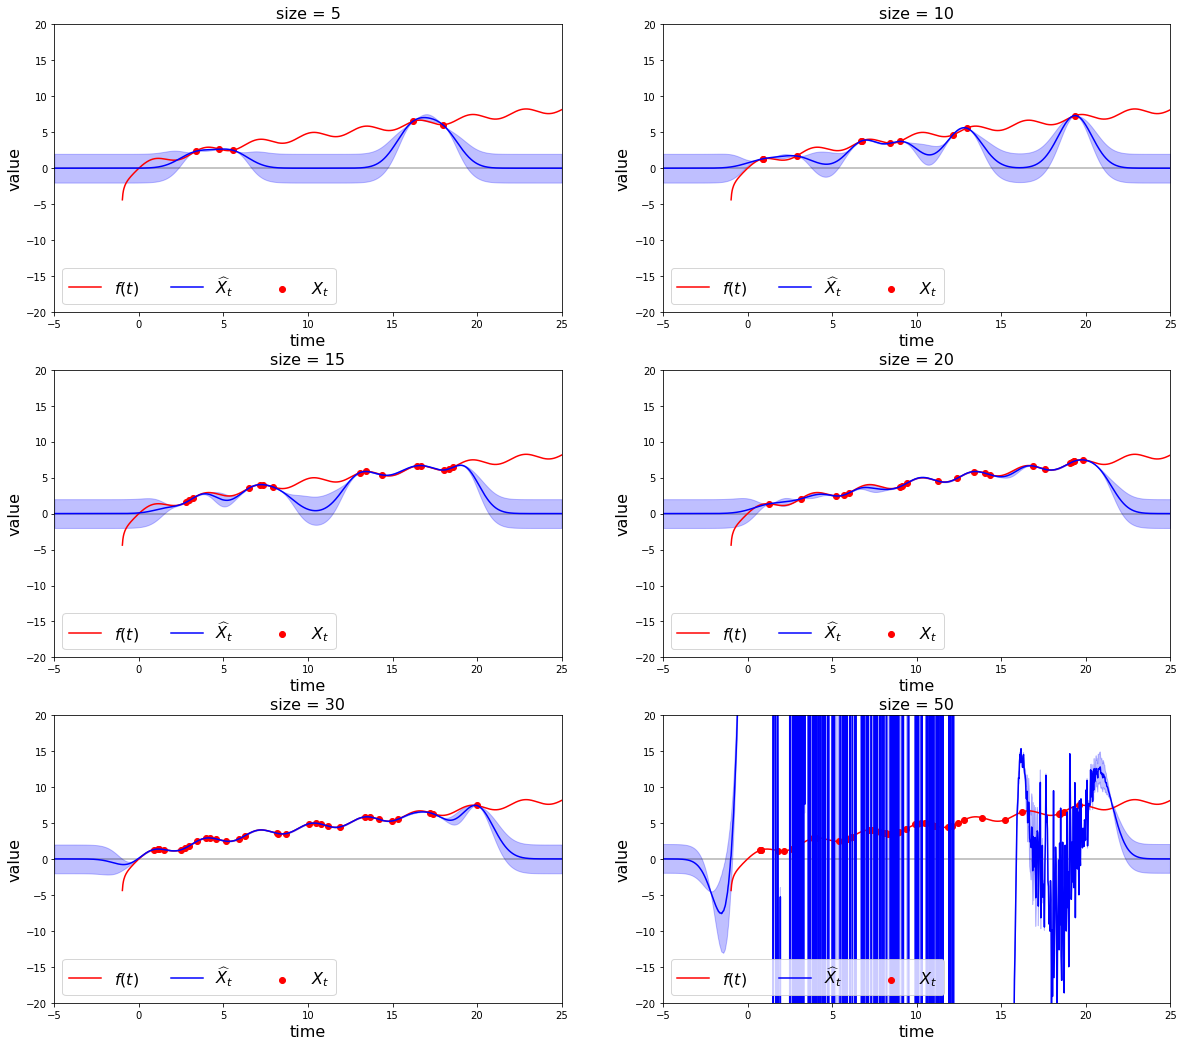

In [142]:
plt.figure(figsize=(20, 18))

# size --- количество наблюдаемых данных
for i, size in enumerate([5, 10, 15, 20, 30, 50]):

    # Генерация данных
    T = sps.uniform(loc=0, scale=20).rvs(size=size)
    X = calc_f(T)
    
    # Сначала выполните код в этой ячейке с закомментированной строчкой кода.
    # Затем скопируйте код в новую ячейку, раскомментируйте строчку и выполните код.
    # X += norm(0, 0.3).rvs(X.shape)

    # Применение регрессии
    gpr = GaussianProcessRegression(exp_cov).fit(T.reshape((-1, 1)), X)
    grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
    predict, sigma = gpr.predict(grid)
    grid, predict, sigma = np.array(grid).ravel(), predict, sigma

    # Построение графиков
    plt.subplot(3, 2, i + 1)
    plt.plot(grid, calc_f(grid), color='red', label='$f(t)$')
    plt.plot(grid, predict, color='blue', label='$\widehat{X}_t$')
    plt.fill_between(grid, predict + 2 * sigma, predict - 2 * sigma, color='blue', alpha=0.25)
    plt.scatter(T, X, color='red', label='$X_t$')
    plt.hlines(0, -5, 25, alpha=0.3)
    plt.xlim((-5, 25))
    plt.ylim((-20, 20))
    plt.title('size = {}'.format(size), fontsize=16)
    plt.xlabel('time', fontsize=16)
    plt.ylabel('value', fontsize=16)
    plt.legend(loc=3, ncol=3, fontsize=16)

plt.show()

Теперь предположим, что измерения проводятся с погрешностью, то есть $\sigma > 0$. Скопируйте код выше в новую ячейку, раскомментируйте строчку кода и запустите.

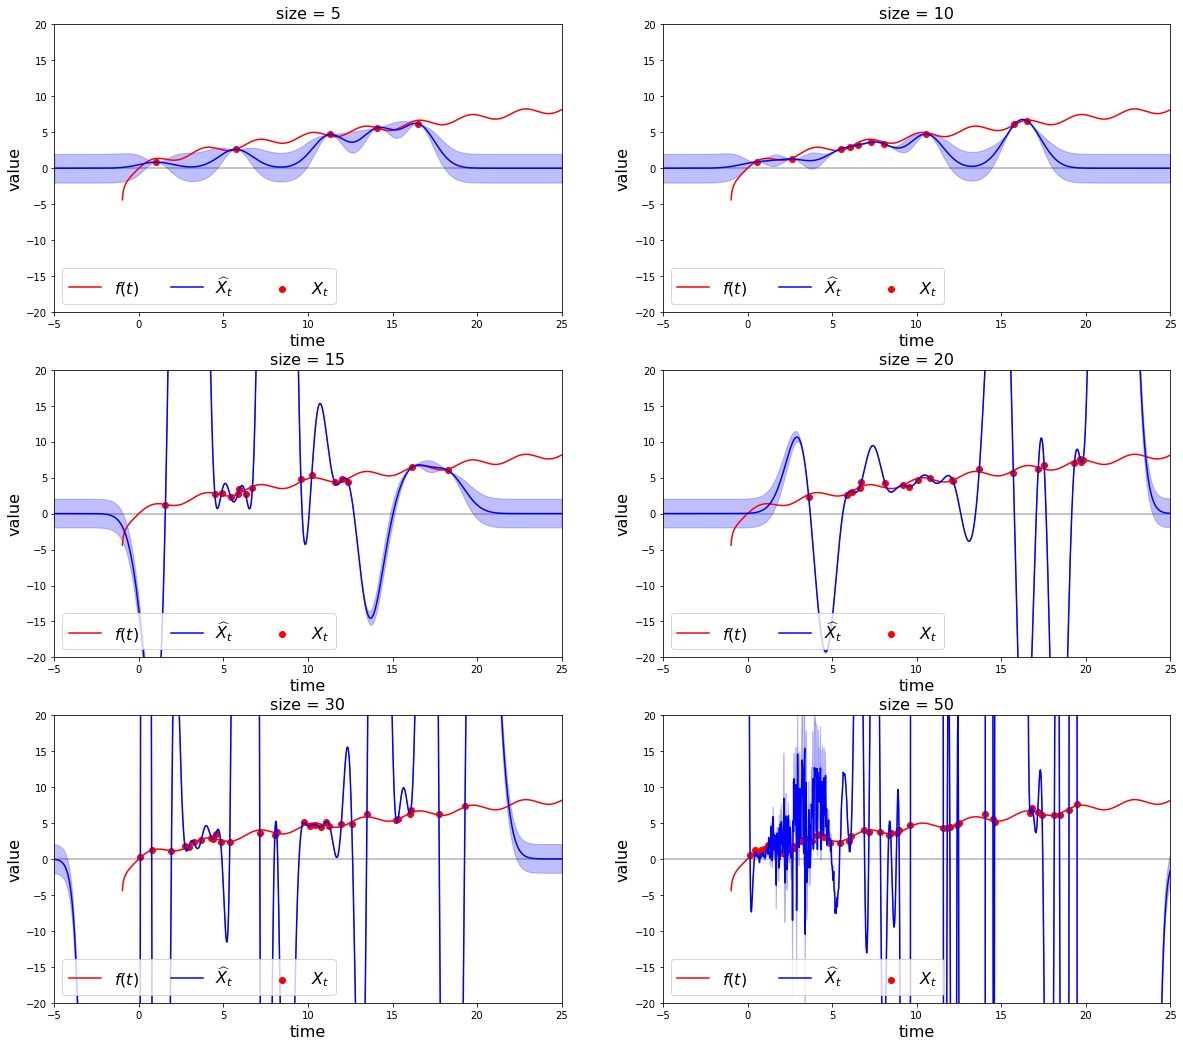

In [143]:
plt.figure(figsize=(20, 18))

# size --- количество наблюдаемых данных
for i, size in enumerate([5, 10, 15, 20, 30, 50]):

    # Генерация данных
    T = sps.uniform(loc=0, scale=20).rvs(size=size)
    X = calc_f(T)
    X += norm(0, 0.3).rvs(X.shape)

    # Применение регрессии
    gpr = GaussianProcessRegression(exp_cov).fit(T.reshape((-1, 1)), X)
    grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
    predict, sigma = gpr.predict(grid)
    grid, predict, sigma = np.array(grid).ravel(), predict, sigma

    # Построение графиков
    plt.subplot(3, 2, i + 1)
    plt.plot(grid, calc_f(grid), color='red', label='$f(t)$')
    plt.plot(grid, predict, color='blue', label='$\widehat{X}_t$')
    plt.fill_between(grid, predict + 2 * sigma, predict - 2 * sigma, color='blue', alpha=0.25)
    plt.scatter(T, X, color='red', label='$X_t$')
    plt.hlines(0, -5, 25, alpha=0.3)
    plt.xlim((-5, 25))
    plt.ylim((-20, 20))
    plt.title('size = {}'.format(size), fontsize=16)
    plt.xlabel('time', fontsize=16)
    plt.ylabel('value', fontsize=16)
    plt.legend(loc=3, ncol=3, fontsize=16)

plt.show()

Почему получается так плохо? Что нужно сделать, чтобы это исправить (обратите внимание на ковариационную функцию)? <br>
Посмотрим на ковариацию в нашем случае : $R(t1, t2) = a\ exp\left(\frac{\left|\left| t_2 - t_1 \right|\right|^2} {2s^2} \right),$ и поймем, что она уменьшается при $t_2 \rightarrow t_1$ (стремится к $a$). То есть ковариация стремится к минимуму при $t_2 \rightarrow t_1$ и значит $X_{t_1}$ и $X_{t_2}$ почти не зависимы. Так как $X_{t_1}$ и $X_{t_2}$  почти не зависимы, то предсказанный процесс может вести себя как на полученных графиков. Нужно добавить зависимость между соседними точками. <br>

Чтобы это исправить применим регуляризацию (эффект самородков): $R(t) = R_0(t) + D_0 I(t = 0)$ <br>
Переделаем ковариационную функцию <br>

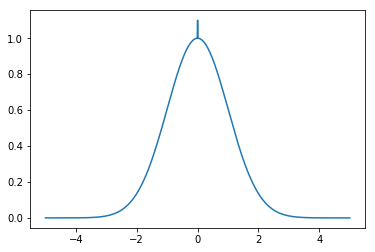

In [144]:
def exp_cov_with_regular(t, a=1, s=1):
    D0 = 1/10
    return a * np.exp(-(t ** 2).sum(axis=-1) / (2 * s ** 2)) + D0 * (t==0).prod(axis=-1)



grid = np.linspace(-5, 5, 1001)
plt.figure(figsize=(6, 4))
plt.plot(grid, exp_cov_with_regular(grid.reshape((-1, 1))))
plt.show()

Нарисуем аналогичные графики.

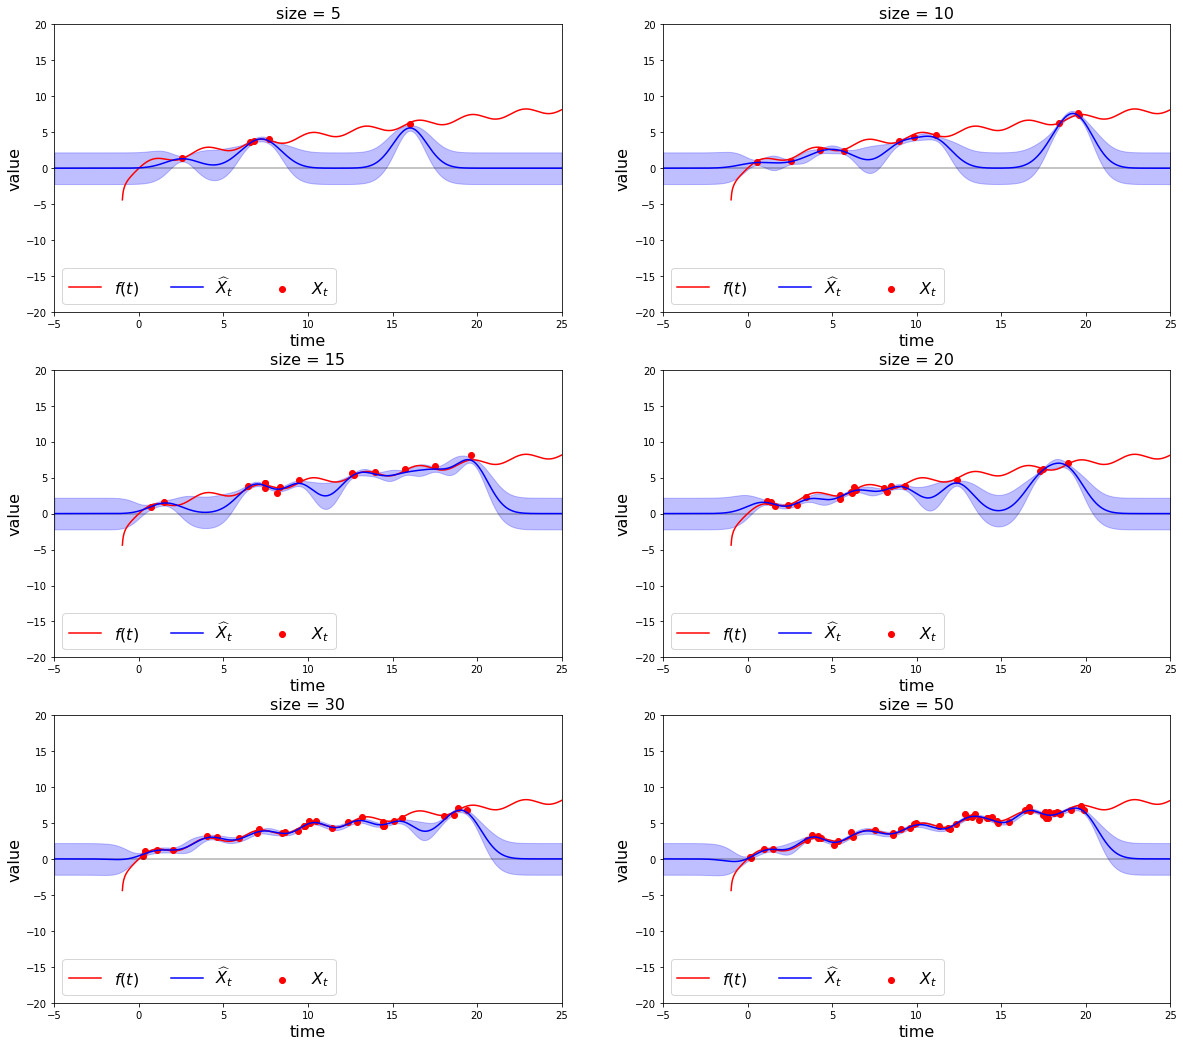

In [145]:
plt.figure(figsize=(20, 18))

# size --- количество наблюдаемых данных
for i, size in enumerate([5, 10, 15, 20, 30, 50]):

    # Генерация данных
    T = sps.uniform(loc=0, scale=20).rvs(size=size)
    X = calc_f(T)
    X += norm(0, 0.3).rvs(X.shape)

    # Применение регрессии
    gpr = GaussianProcessRegression(exp_cov_with_regular).fit(T.reshape((-1, 1)), X)
    grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
    predict, sigma = gpr.predict(grid)
    grid, predict, sigma = np.array(grid).ravel(), predict, sigma

    # Построение графиков
    plt.subplot(3, 2, i + 1)
    plt.plot(grid, calc_f(grid), color='red', label='$f(t)$')
    plt.plot(grid, predict, color='blue', label='$\widehat{X}_t$')
    plt.fill_between(grid, predict + 2 * sigma, predict - 2 * sigma, color='blue', alpha=0.25)
    plt.scatter(T, X, color='red', label='$X_t$')
    plt.hlines(0, -5, 25, alpha=0.3)
    plt.xlim((-5, 25))
    plt.ylim((-20, 20))
    plt.title('size = {}'.format(size), fontsize=16)
    plt.xlabel('time', fontsize=16)
    plt.ylabel('value', fontsize=16)
    plt.legend(loc=3, ncol=3, fontsize=16)

plt.show()

Почему стало лучше?

Теперь соседние точки более зависимы друг от друга и поэтому нет резких скачков.


Пойдем теперь дальше. Вспомним наше предположение о том, что математическое ожидание равно нулю, хотя на самом деле это не так.
Давайте это исправим.
В примере выше перед применением регрессии вычтете среднее значение, а после --- добавьте обратно.

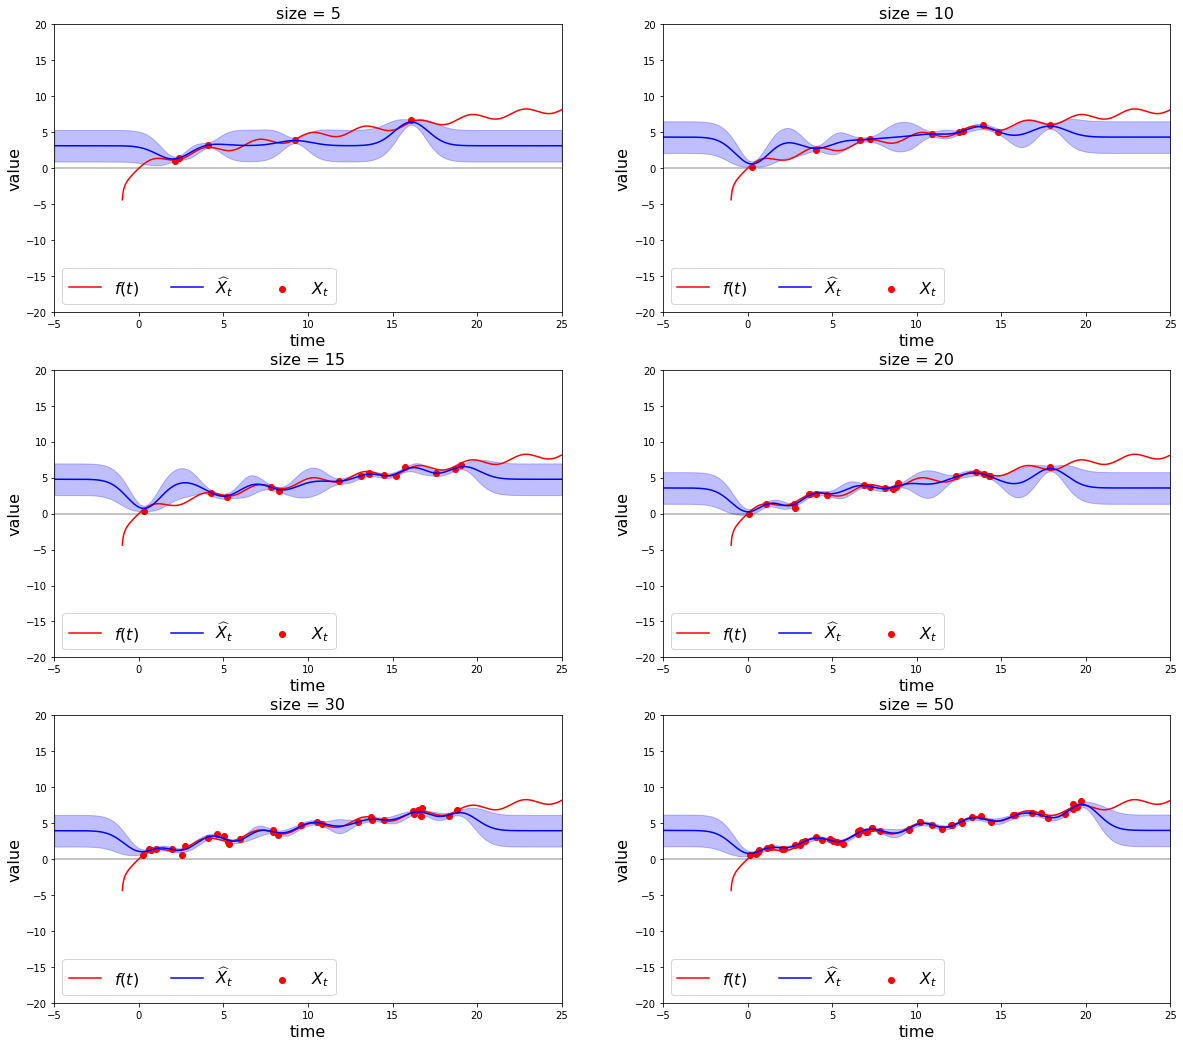

In [146]:
plt.figure(figsize=(20, 18))

# size --- количество наблюдаемых данных
for i, size in enumerate([5, 10, 15, 20, 30, 50]):

    # Генерация данных
    T = sps.uniform(loc=0, scale=20).rvs(size=size)
    X = calc_f(T)
    mean = np.mean(X)
    X += norm(0, 0.3).rvs(X.shape)

    # Применение регрессии
    gpr = GaussianProcessRegression(exp_cov_with_regular).fit(T.reshape((-1, 1)), X - mean)
    grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
    predict, sigma = gpr.predict(grid)
    grid, predict, sigma = np.array(grid).ravel(), predict + mean, sigma

    # Построение графиков
    plt.subplot(3, 2, i + 1)
    plt.plot(grid, calc_f(grid), color='red', label='$f(t)$')
    plt.plot(grid, predict, color='blue', label='$\widehat{X}_t$')
    plt.fill_between(grid, predict + 2 * sigma, predict - 2 * sigma, color='blue', alpha=0.25)
    plt.scatter(T, X, color='red', label='$X_t$')
    plt.hlines(0, -5, 25, alpha=0.3)
    plt.xlim((-5, 25))
    plt.ylim((-20, 20))
    plt.title('size = {}'.format(size), fontsize=16)
    plt.xlabel('time', fontsize=16)
    plt.ylabel('value', fontsize=16)
    plt.legend(loc=3, ncol=3, fontsize=16)

plt.show()

Лучше, но все равно чего-то не хватает.
Может, приблизить линейной регрессией?

Проделайте аналогичные действия, построив сначала линейную регрессию, затем вычев ее значения из точек данных перед применением регрессии на гауссовских процессах, а после --- добавив обратно значения линейной регрессии для всех точек, в которых вы хотите построить предсказания.

In [149]:
size = 100
T = uniform(loc=0, scale=20).rvs(size=size)
X = calc_f(T)
X += norm(0, 0.3).rvs(X.shape)

linear_regres = sps.linregress(T, X)
print(linear_regres)


LinregressResult(slope=0.31673910432333896, intercept=1.0101953708283054, rvalue=0.96882975732036447, pvalue=3.3740945686271987e-61, stderr=0.0081811687544802222)


Как видим по немаленькому slope линейную зависимость тенденции действительно не плохо бы учитывать. <br>

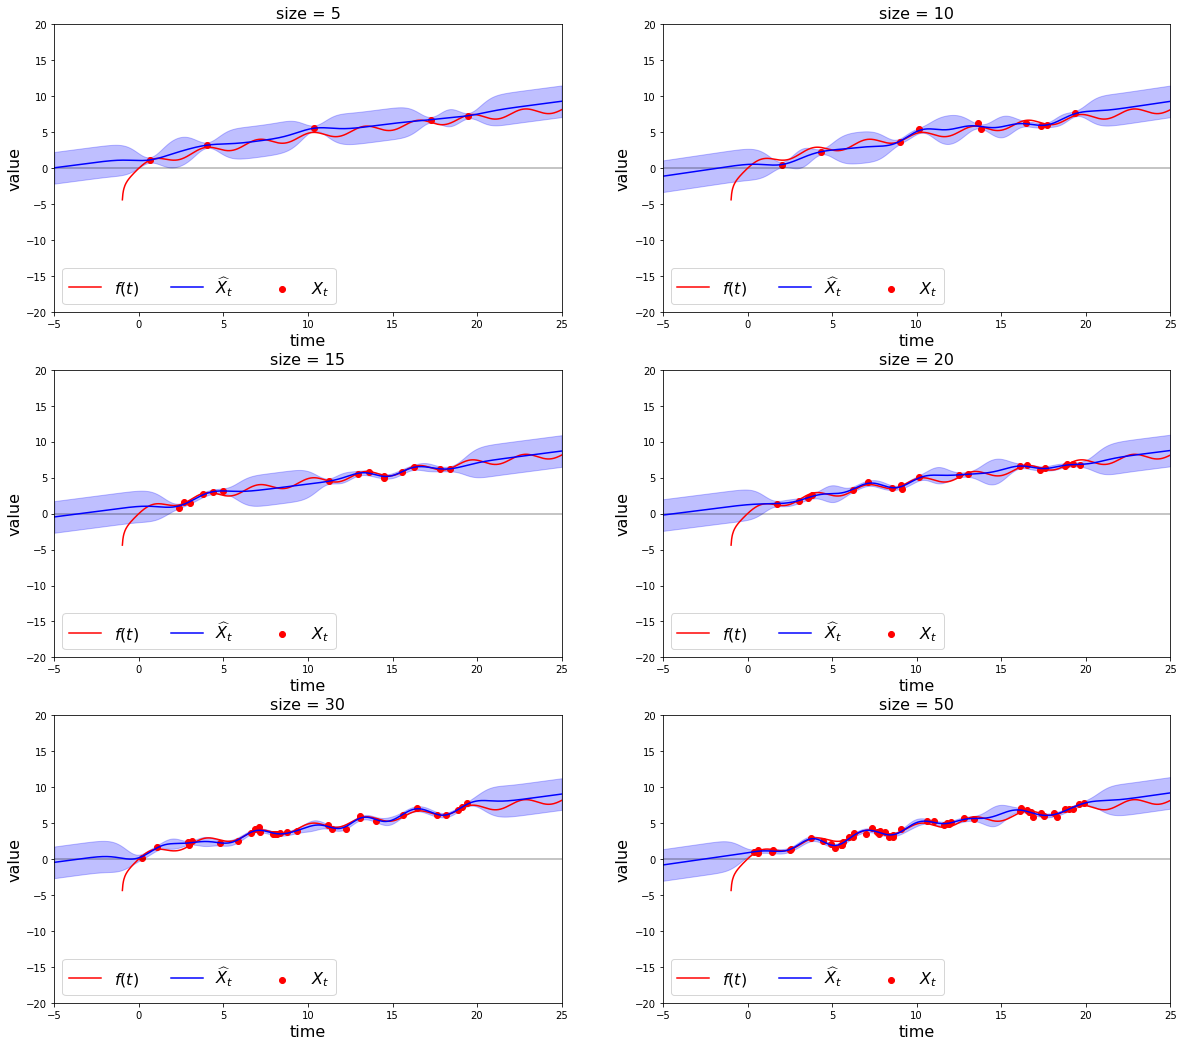

In [169]:
plt.figure(figsize=(20, 18))

# size --- количество наблюдаемых данных
for i, size in enumerate([5, 10, 15, 20, 30, 50]):

    # Генерация данных
    T = uniform(loc=0, scale=20).rvs(size=size)
    X = calc_f(T)
    X += norm(0, 0.3).rvs(X.shape)
    linear_regress = sps.linregress(T, X)
    trend = linear_regress[0]*T + linear_regress[1]
    
    # Применение регрессии
    gpr = GaussianProcessRegression(exp_cov_with_regular).fit(T.reshape((-1, 1)), X - trend)
    grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
    predict, sigma = gpr.predict(grid)
    trend = linear_regress[0]*grid.reshape(len(grid)) + linear_regress[1]
    grid, predict, sigma = np.array(grid).ravel(), predict + trend, sigma


    # Построение графиков
    plt.subplot(3, 2, i + 1)
    plt.plot(grid, calc_f(grid), color='red', label='$f(t)$')
    plt.plot(grid, predict, color='blue', label='$\widehat{X}_t$')
    plt.fill_between(grid, predict + 2 * sigma, predict - 2 * sigma, color='blue', alpha=0.25)
    plt.scatter(T, X, color='red', label='$X_t$')
    plt.hlines(0, -5, 25, alpha=0.3)
    plt.xlim((-5, 25))
    plt.ylim((-20, 20))
    plt.title('size = {}'.format(size), fontsize=16)
    plt.xlabel('time', fontsize=16)
    plt.ylabel('value', fontsize=16)
    plt.legend(loc=3, ncol=3, fontsize=16)

plt.show()

Теперь, как видим, гораздо большая доля точек попадает в доверительный интервал. Также видим, что теперь синяя кривая ( $\widehat{X}_t$ ) еще больше приближает красную ($f(t)$) кривую.

Разберемся подробнее в том, что происходит.

Допустим, мы хотим приблизить простую линейную функцию.
Построим график выборки и график предсказаний с помощью линейной регрессии.
Построим так же график ошибок, то есть точек $X_{t_i} - \widehat{f}(t_i)$, где $\widehat{f}$ --- линейная регрессия.

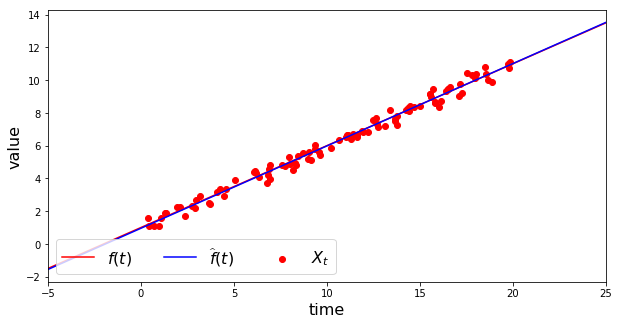

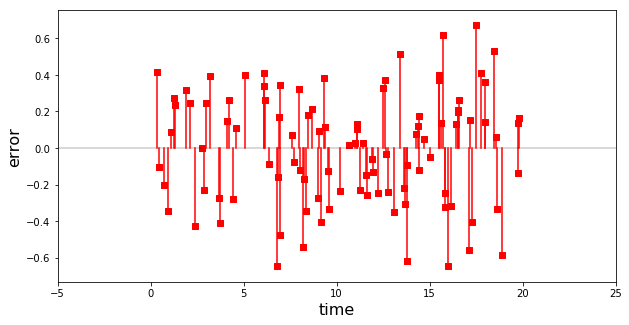

In [185]:
def f_lin(x):
    return x / 2 + 1

T = uniform(loc=0, scale=20).rvs(size=100).reshape((-1, 1))

X = f_lin(T)
X += norm(0, 0.3).rvs(X.shape)

linear_regress = sps.linregress(T.ravel(), X.ravel())

grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
predict = linear_regress[0]*grid.reshape(len(grid)) + linear_regress[1]

# График выборки и линейной регресии
plt.figure(figsize=(10, 5))
plt.plot(grid, f_lin(grid), color='red', label='$f(t)$')
plt.plot(grid, predict, color='blue', label='$\widehat{f}(t)$')
plt.scatter(T, X, color='red', label='$X_t$')
plt.xlim((-5, 25))
plt.xlabel('time', fontsize=16)
plt.ylabel('value', fontsize=16)
plt.legend(loc=3, ncol=3, fontsize=16)
plt.show()

# График ошибок
plt.figure(figsize=(10, 5))
predict = linear_regress[0] * T.reshape(len(T)) + linear_regress[1]
for i in range(len(T)):
    plt.plot([T[i], T[i]], [0, X[i] - predict[i]], color='red')
    plt.scatter(T[i], X[i] - predict[i], marker='s', color='red')
plt.hlines(0, -5, 25, alpha=0.2)
plt.xlim((-5, 25))
plt.xlabel('time', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.show()

Что можно сказать про остатки? <br>
Как видим по первому графику, мы предсказали функцию достаточно точно, поэтому остатки появляются за счет того, что изначально мы добавили к данным шум. Таким образом, остатки имеют нормальное распределение.

Теперь посмотрим на функцию, с которой мы имели дело ранее.

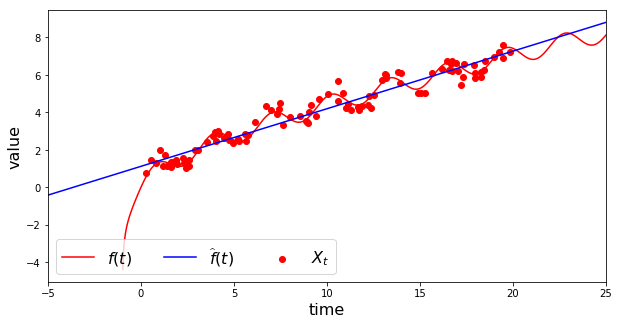

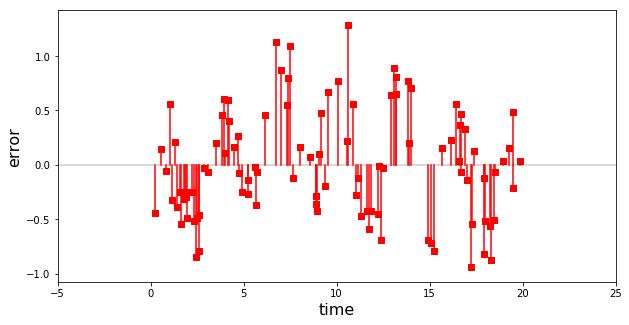

In [187]:
T = uniform(loc=0, scale=20).rvs(size=100).reshape((-1, 1))

X = calc_f(T)
X += norm(0, 0.3).rvs(X.shape)

linear_regress = sps.linregress(T.ravel(), X.ravel())

grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
predict = linear_regress[0]*grid.reshape(len(grid)) + linear_regress[1]

# График выборки и линейной регресии
plt.figure(figsize=(10, 5))
plt.plot(grid, calc_f(grid), color='red', label='$f(t)$')
plt.plot(grid, predict, color='blue', label='$\widehat{f}(t)$')
plt.scatter(T, X, color='red', label='$X_t$')
plt.xlim((-5, 25))
plt.xlabel('time', fontsize=16)
plt.ylabel('value', fontsize=16)
plt.legend(loc=3, ncol=3, fontsize=16)
plt.show()

# График ошибок
plt.figure(figsize=(10, 5))
predict = linear_regress[0]*T.reshape(len(T)) + linear_regress[1]
for i in range(len(T)):
    plt.plot([T[i], T[i]], [0, X[i] - predict[i]], color='red')
    plt.scatter(T[i], X[i] - predict[i], marker='s', color='red')
plt.hlines(0, -5, 25, alpha=0.2)
plt.xlim((-5, 25))
plt.xlabel('time', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.show()

Что тут с остатками?

Здесь уже нельзя сказать, что остатки имеют нормальное распределение, так как из первого графика мы видим, что мы предсказываем функцию достаточно неточно, а поэтому в остаток будет входить не только шум, но и ошибка. Посмотрев на функцию calc_f можно понять, что линейной регрессией мы находим прямую, апроксимирующую функцию  $log(1+t) + at$, а синусоида $b sin(ct)$ уходит в ошибку. На самом деле на втором графике слегка видна синусоида, но в силу шума, это видно нечетко.


Давайте приближать эту зависимость в остатках регрессией на основе гауссовских процессах.

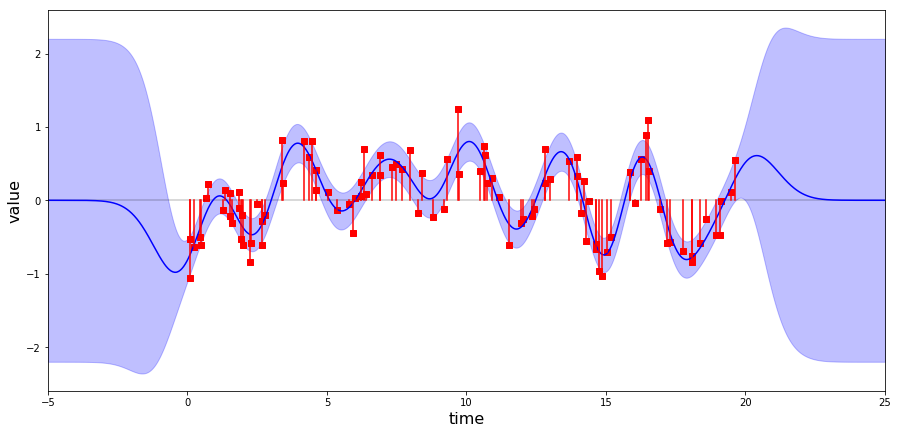

In [194]:
T = uniform(loc=0, scale=20).rvs(size=100)

X = calc_f(T)
X += norm(0, 0.3).rvs(X.shape)

#линейная регрессия
linear_regress = sps.linregress(T, X)
trend = linear_regress[0] * T.reshape(len(T)) + linear_regress[1]


#приближаю зависимость в остатках аналогично тому,как ранее
gpr = GaussianProcessRegression(exp_cov_with_regular).fit(T.reshape((-1, 1)), X - trend)
grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
predict, sigma = gpr.predict(grid)

grid, predict, sigma = np.array(grid).ravel(), predict, sigma


plt.figure(figsize=(15, 7))
plt.plot(grid, predict, color='blue')
plt.fill_between(grid, predict + 2 * sigma, predict - 2 * sigma, color='blue', alpha=0.25)


for i in range(len(T)):
    plt.plot([T[i], T[i]], [0, X[i] - trend[i]], color='red')
    plt.scatter(T[i], X[i] - trend[i], marker='s', color='red')
plt.hlines(0, -5, 25, alpha=0.2)
plt.xlim((-5, 25))
plt.xlabel('time', fontsize=16)
plt.ylabel('value', fontsize=16)
plt.show()

Сделайте подробные выводы. <br>

Как видим линейная регрессия и регрессия на гауссовских процессах вместе дают хорошие результаты..


Рассмотрим теперь гауссовский процесс $(X_t, t\in\mathbb{R}_+)$, заданный как $X_t = t + W_{t+1} - W_{t}$, где $(W_t, t\in\mathbb{R}_+)$ --- винеровский процесс.
Сгенерируйте данные в соответствии с этой моделью. Для генерации винеровского процесса используйте код из предыдущего задания. По этим данным постройте комбинацию линейная регрессия + регрессия на гауссовских процессах, как в примерах выше. Как и раньше, проведите эксперимент для различного объема данных.

In [195]:
class WinerProcess:
        
    def __init__(self, precision=10000):
        self.precision = precision
        
        #массив для хранения нормально распределенных величин (имеет размер (k, precision) для некоторого k)
        self.xi = []
        
        #генерируем отрезок [0,pi]
        self._init_generate()
        #ставим границу равную 1 (так как уже сгенерировали первый отрезок)
        self.board = 1
        
    def __getitem__(self, times):
        max_time = np.max(times)
        k = int((max_time // np.pi) + 1)
        
        #если нужно, генерируем
        if k > self.board:
            self._generate(k)
        
        #находим массив W_i_pi для разных i (массив значений в точках вида i*pi)
        W_i_pi = np.append(0, np.cumsum(self.xi[:,0]) * np.sqrt(np.pi))
        
        #номера интервалов и время внутри интервала (т.е. остаток от делениия на pi) для каждого times[i]
        intervals = np.array(times // np.pi, dtype=int)
        times_in_intervals = times % np.pi
        
        #коэфициенты по которым происходит сумирование во втором слагаемом
        grid = np.tile(np.arange(1, self.precision+1), (len(times), 1))
        
        #первое слагаемое
        first_term = self.xi[intervals,0] *  times_in_intervals / np.sqrt(np.pi)
        #второе слагаемое (большая сумма)
        second_term = np.sqrt(2/np.pi) * np.sum((np.sin(grid * times_in_intervals.reshape((len(times), 1))) / grid) * self.xi[intervals,1:], axis=1)
        
        result = W_i_pi[intervals] + second_term + first_term
        return result
        
        
    #метод, генерирующий процесс на отрезке [0, pi]
    def _init_generate(self):
        sample = sps.norm(loc=0, scale=1).rvs(size=(self.precision+1))
        self.xi.append(sample)
        self.xi = np.array(self.xi).reshape((1, self.precision+1))

    #метод, генерирующий процесс на отрезке [board*pi, k*pi]  
    def _generate(self, k):
        #кол-во отрезков, которые нужно сгенерировать
        count_intervals = k - self.board
        
        #генерирую случайные величины для всех count_intervals отрезков
        sample = sps.norm(loc=0, scale=1).rvs(size=(count_intervals, self.precision+1))
        self.xi = np.concatenate((self.xi, sample), axis=0)
        
        #сдвигаем границу
        self.board = k

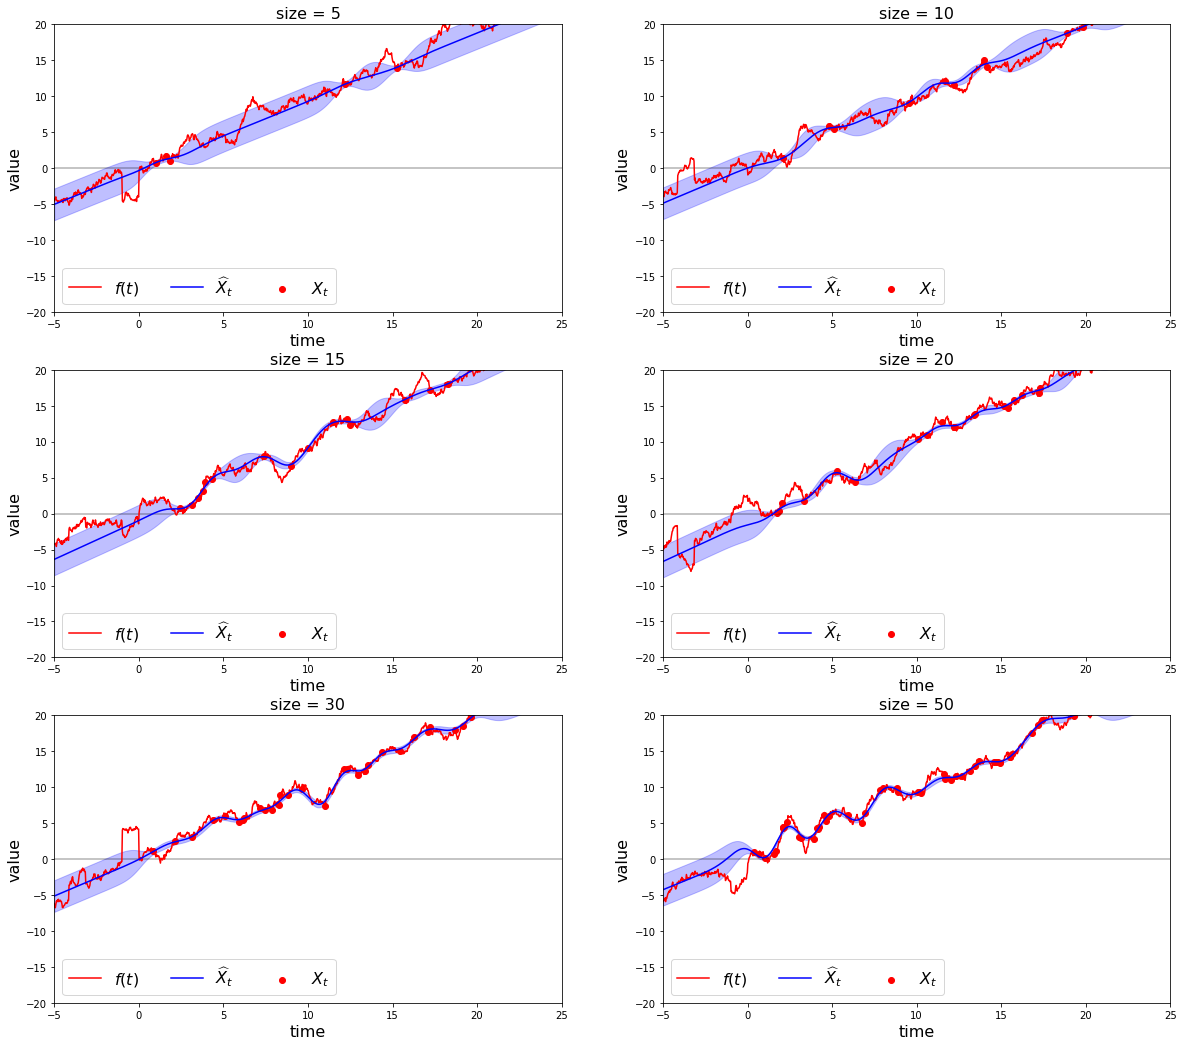

In [202]:
plt.figure(figsize=(20, 18))

# size --- количество наблюдаемых данных
for i, size in enumerate([5, 10, 15, 20, 30, 50]):

    # Генерация данных
    T = sps.uniform(loc=0, scale=20).rvs(size=size)
    Wt = WinerProcess()
    X = T + Wt[T + 1] - Wt[T]
    
    #Применение линейной регрессии
    linear_regress = sps.linregress(T, X)
    trend = linear_regress[0] * T.reshape(len(T)) + linear_regress[1]
    
    # Применение регрессии
    gpr = GaussianProcessRegression(exp_cov_with_regular).fit(T.reshape((-1, 1)), X - trend)
    grid = np.linspace(-5, 25, 1000).reshape((-1, 1))
    predict, sigma = gpr.predict(grid)
    trend = linear_regress[0] * grid.reshape(len(grid)) + linear_regress[1]
    grid, predict, sigma = np.array(grid).ravel(), predict + trend, sigma

    # Построение графиков
    plt.subplot(3, 2, i + 1)
    values = grid + Wt[grid + 1] - Wt[grid]
    plt.plot(grid, values, color='red', label='$f(t)$')
    plt.plot(grid, predict, color='blue', label='$\widehat{X}_t$')
    plt.fill_between(grid, predict + 2 * sigma, predict - 2 * sigma, color='blue', alpha=0.25)
    plt.scatter(T, X, color='red', label='$X_t$')
    plt.hlines(0, -5, 25, alpha=0.3)
    plt.xlim((-5, 25))
    plt.ylim((-20, 20))
    plt.title('size = {}'.format(size), fontsize=16)
    plt.xlabel('time', fontsize=16)
    plt.ylabel('value', fontsize=16)
    plt.legend(loc=3, ncol=3, fontsize=16)

plt.show()

Скачайте датасет <a href="http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics">Yacht Hydrodynamics</a>.
Задача состоит в том, чтобы для парусных яхт предсказать остаточное сопротивление на единицу массы смещения от размеров яхты и ее скорости. Рассмотрим зависимость величины `Residuary resistance` от `Froude number`. Постройте приближение этой зависимости с помощью комбинации линейной регрессии и регрессии на гауссовских процессах. Посчитайте ошибку предсказания и сравните ее с ошибкой предсказания с помощью простой линейной регрессии. Для линейной регрессии можно взять так же вторую и третью степень величины `Residuary resistance`.

In [241]:
names = ['Longitudinal position of the center of buoyancy','Prismatic coefficient', 
         'Length-displacement ratio', 'Beam-draught ratio', 'Length-beam ratio', 
         'Froude number', 'Residuary resistance per unit weight of displacement']

frame = pd.read_csv('yacht_hydrodynamics.data', encoding = 'latin1', sep='\s+', names=names, error_bad_lines=False)


Посмотрим как выглядит таблица

In [242]:
frame.head(5)

,Longitudinal position of the center of buoyancy,Prismatic coefficient,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,Froude number,Residuary resistance per unit weight of displacement
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [246]:
froude_number = list(frame['Froude number'])
resistance = list(frame['Residuary resistance per unit weight of displacement'])

Сначала усредним resistance по froude_number, так как иначе в матрице C будет слишком много одинаковых элементов и она станет вырожденной, что плохо, так как нам нужна обратимость.

In [263]:
#усредняем resistance по froude_number. 

number_sum = dict()
number_count = dict()
for i in range(len(froude_number)):
    if froude_number[i] in number_sum.keys():
        number_sum[froude_number[i]] += resistance[i]
        number_count[froude_number[i]] += 1
    else:
        number_sum[froude_number[i]] = resistance[i]
        number_count[froude_number[i]] = 1

froude_number_ = []
resistance_ = []

for number in number_sum.keys():
    froude_number_.append(number)
    resistance_.append(number_sum[number] / number_count[number])
    
froude_number_ = np.array(froude_number_).reshape((len(froude_number_), 1))
resistance_ = np.array(resistance_)

Сначала применим линейную регрессию. Для линейной регрессии берем вторую и третью степень величины  Froude number.

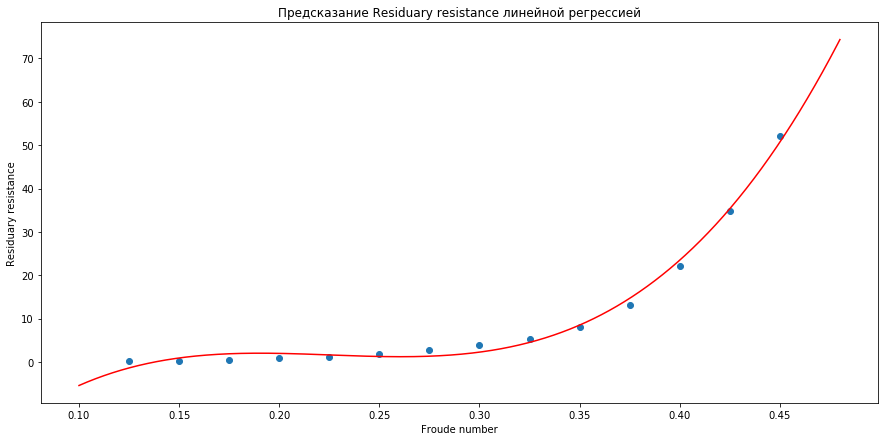

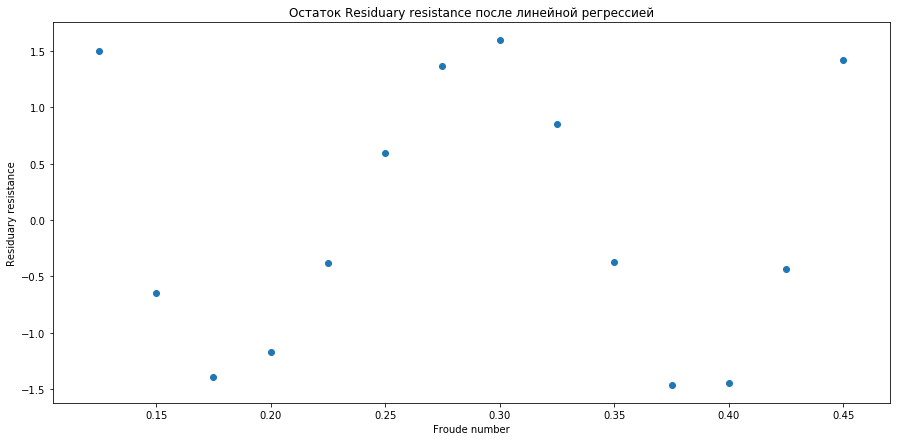

In [314]:
T = np.concatenate((froude_number_, froude_number_ ** 2, froude_number_ ** 3), axis =1)
X = resistance_.reshape((len(resistance_), 1))

linreg = LinearRegression()
linreg.fit(T, X)

coefs = linreg.coef_.ravel()
intercept = linreg.intercept_

linear = froude_number_*coefs[0] + (froude_number_**2)*coefs[1] + (froude_number_**3)*coefs[2] + intercept

plt.figure(figsize=(15, 7))
grid = np.linspace(0.1, 0.48, 1000)
plt.plot(grid, grid*coefs[0] + (grid**2)*coefs[1] + (grid**3)*coefs[2] + intercept, color='red')
plt.scatter(froude_number_, resistance_)
plt.title('Предсказание Residuary resistance линейной регрессией')
plt.ylabel('Residuary resistance')
plt.xlabel('Froude number')
plt.show()


plt.figure(figsize=(15, 7))
grid = np.linspace(0.1, 0.48, 1000)
plt.scatter(froude_number_, resistance_.ravel() - linear.ravel())
plt.title('Остаток Residuary resistance после линейной регрессией')
plt.ylabel('Residuary resistance')
plt.xlabel('Froude number')
plt.show()

Линейная регрессия предсказала неплохо, однако видно, что остался остаток, похожий на синусоиду.

Применим регрессию на гауссовских процессах для остатка

In [340]:
#немного изменим ковариационную функцию. 
#так как иначе t будет слишком маленьким, и мы получим слишком маленькую чувствительность
def  exp_cov_with_regular_(t, a=1, s=1):
    return exp_cov_with_regular(t * 40, a, s)


In [341]:
gpr = GaussianProcessRegression(exp_cov_with_regular_).fit(froude_number_.reshape((-1, 1)), 
                                                           resistance_.ravel() - linear.ravel())
grid = np.linspace(0, 0.5, 1000).reshape((-1, 1))
predict, sigma = gpr.predict(grid)
grid, predict, sigma = np.array(grid).ravel(), predict, sigma



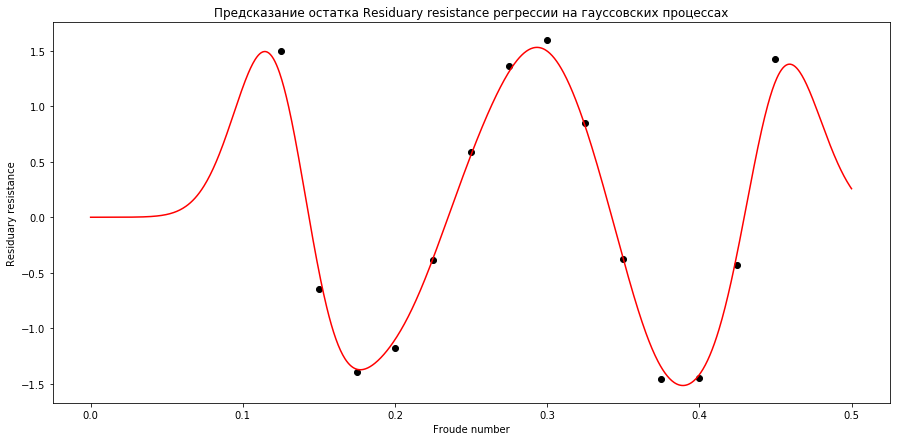

In [342]:
plt.figure(figsize=(15, 7))
plt.scatter(froude_number_, resistance_ - linear.ravel(), color = 'black', label = 'X без смещения')
plt.plot(grid, predict, color = 'red', label='predict без смещения')
plt.title('Предсказание остатка Residuary resistance регрессии на гауссовских процессах')
plt.ylabel('Residuary resistance')
plt.xlabel('Froude number')
plt.show()

Как видим, получилось довольно похоже.
Теперь посмотрим на полную картину.

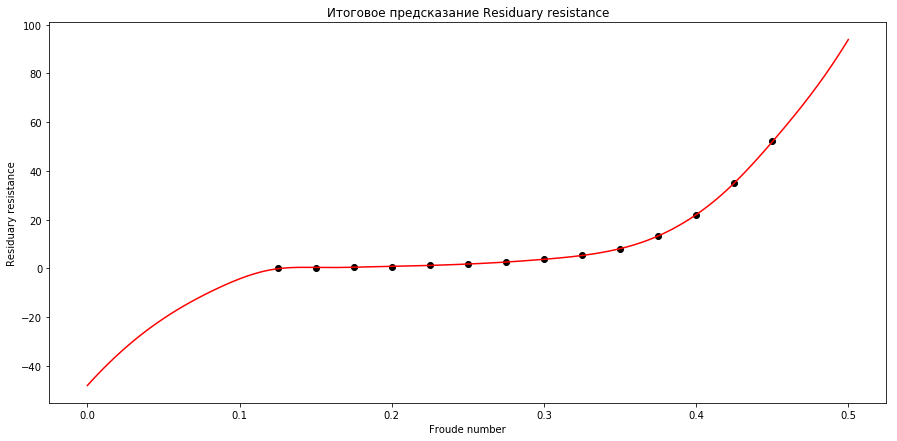

In [343]:
plt.figure(figsize=(15, 7))
plt.scatter(froude_number_, resistance_, color = 'black', label = 'X без смещения')
plt.plot(grid, predict + grid*coefs[0] + (grid**2)*coefs[1] + (grid**3)*coefs[2] + intercept,
         color = 'red')
plt.title('Итоговое предсказание Residuary resistance')
plt.ylabel('Residuary resistance')
plt.xlabel('Froude number')
plt.show()

**Вывод:** <br>
На последнем графике видно, что линейная регрессия и регрессия на гауссовских процессах вместе работают довольно хорошо. Этот факт также пронаблюдали и в других экспериментах (предсказание значений функции, винеровского процесса)